In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time,clock

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Songti = matplotlib.font_manager.FontProperties(fname='D:\simsun.ttf')
Times = matplotlib.font_manager.FontProperties(fname='D:\Times New Roman.ttf')



# 静态指标云图

In [85]:
def cloud_model(Ex, En, He, n):
    """
    生成云模型数据
    :param Ex: 期望
    :param En: 熵
    :param He: 超熵
    :param n: 云滴个数
    :return: 随机生成的数据
    """
    Y = np.zeros((1, n))
    np.random.seed(int(time()))
    X = np.random.normal(loc=En, scale=He, size=n)
    Y = Y[0]

    
    for i in range(n):
        np.random.seed(int(time()) + i + 1)
        Enn = X[i]
        X[i] = np.random.normal(loc=Ex, scale=np.abs(Enn), size=1)
        Y[i] = np.exp(-(X[i] - Ex) * (X[i] - Ex) / (2 * Enn * Enn))
        
        
        
    return X, Y


def plot(param):
    """根据参数绘图"""
    fig = plt.figure(len(plt.get_fignums()),figsize=(30,20), dpi=100) 
    
    bwith = 3
    
    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    plt.tick_params(width=3,length=20,color='black') #刻度线
    
    plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
    
    for i in range(len(param)):
        if i == 0:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        elif i == 1:
            plt.scatter(param[i][0], param[i][1],color = 'orange')
        elif i == 2:
            plt.scatter(param[i][0], param[i][1],color = 'r')
        else:
            plt.scatter(param[i][0], param[i][1],color = 'royalblue')
 
# # 第二种配色
#     for i in range(len(param)):
#         if i == 0:
#             plt.scatter(param[i][0], param[i][1],color = 'r')
#         elif i == 1:
#             plt.scatter(param[i][0], param[i][1],color = 'orange')
#         elif i == 2:
#             plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
#         else:
#             plt.scatter(param[i][0], param[i][1],color = 'royalblue')
            
    
            
            
#     plt.title('{}S0{}S1{}S2'.format(' '*6, ' '*16, ' '*27,  ), loc="left", fontproperties = Times, fontsize = 85) 
    plt.title('{}S2{}S1{}S0'.format(' '*18, ' '*27, ' '*15,  ), loc="left", fontproperties = Times, fontsize = 85) 
        
#     plt.title('{}低水平{}较低水平{}中等水平{}较高水平{}高水平'pi.format(' '*0, ' '*26, ' '*10, ' '*10, ' '*8), loc="left",fontsize=50) 
#     legend = plt.legend(title='{}低水平{}较低水平{}中等水平{}较高水平{}高水平'.format(' '*15, ' '*38, ' '*20, ' '*15, ' '*10))
#     legend._legend_box.align = "left"
    plt.xlabel('分值',fontproperties = Songti, fontsize=85)
    plt.ylabel('确定度',fontproperties = Songti, fontsize=85)
    plt.xticks(fontproperties = Times, fontsize=75)
    plt.yticks(fontproperties = Times, fontsize=75)
    plt.xlim((0,10))
    
#     保存图片

#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X5.svg')
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X6.svg')
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X7.svg')
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X8.svg')

In [86]:
# X1, Y1 = cloud_model(1, 0.3333, 0.1, 3000)
# X2, Y2 = cloud_model(3.5,0.5,0.1, 3000)
# X3, Y3 = cloud_model(7.5,0.8333, 0.1, 3000)

# X4, Y4 = cloud_model(1.075,0.305,0.051, 3000)
# X4, Y4 = cloud_model(0.775,0.133,0.066, 3000)


In [92]:
X1, Y1 = cloud_model(9, 0.3333, 0.1, 3000)
X2, Y2 = cloud_model(6.5,0.5,0.1, 3000)
X3, Y3 = cloud_model(2.5,0.8333, 0.1, 3000)


# X4, Y4 = cloud_model(8.238,0.247,0.082, 3000)
X4, Y4 = cloud_model(5.688,0.548,0.139, 3000)

In [93]:
# X6, Y6 = cloud_model(76.939, 4.839, 1.141, 3500)
param = [[X1, Y1], [X2, Y2], [X3, Y3],[X4, Y4]]
# param = [[X1, Y1], [X2, Y2], [X3, Y3]]

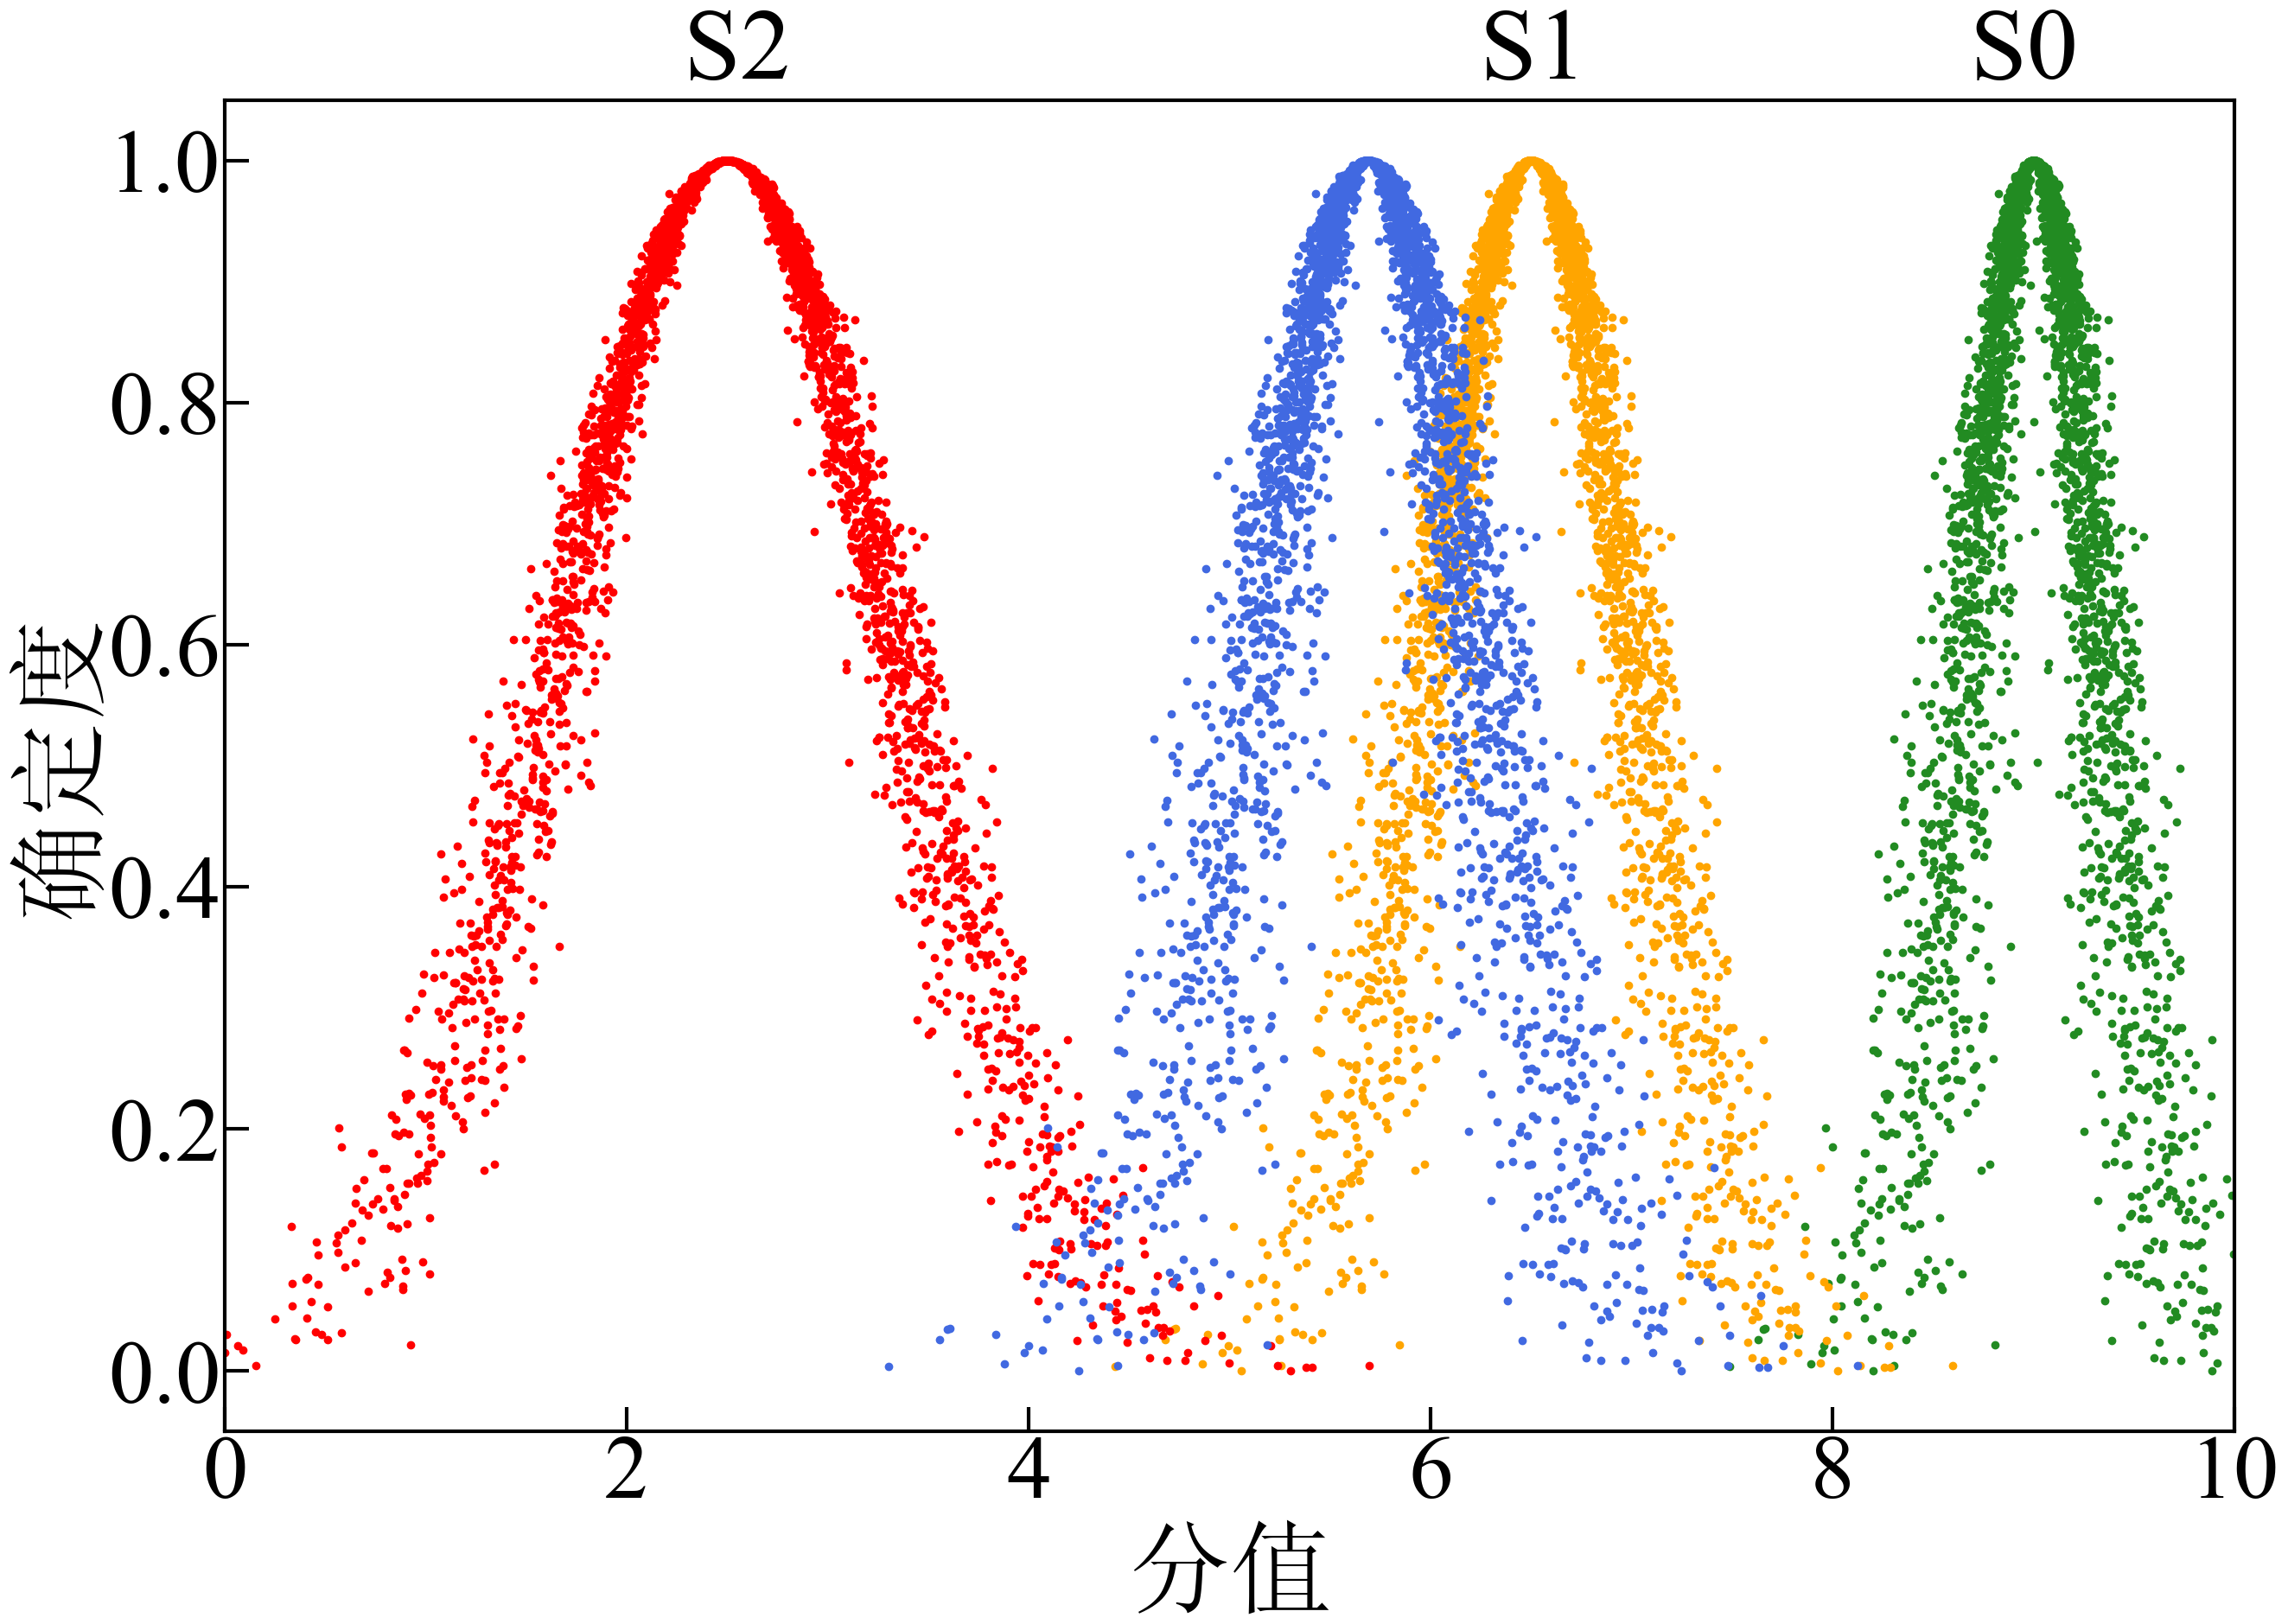

In [94]:
fig = plot(param=param)

#  动态指标云图

In [47]:
# 1.半边云图

# 1.1 右半边云图

def R_cloud_model(Ex, En, He, n): 
    """
    生成云模型数据
    :param Ex: 期望
    :param En: 熵
    :param He: 超熵
    :param n: 云滴个数
    :return: 随机生成的数据
    """
    Y = np.zeros((1, n))
    np.random.seed(int(time()))
    X = np.random.normal(loc=En, scale=He, size=n)  ### 一开始X定义为 En 的正态分布
    Y = Y[0]

    for i in range(n):
        np.random.seed(int(time()) + i + 1)
        Enn = X[i]
        X[i] = np.random.normal(loc=Ex, scale=np.abs(Enn), size=1)
        if  X[i] < Ex:
            Y[i] = np.exp(-(X[i] - Ex) * (X[i] - Ex) / (2 * Enn * Enn))
           
        else:
#             X[i] = np.random.randint(Ex,100)
            Y[i] = 1
            print(X[i], Y[i])
    return X, Y
#         else:
#             for i in range(n):
#                 np.random.seed(int(time()) + i + 1)
#                 Enn = X[i]
#                 X[i] = np.random.randint(Ex-Enn, Ex+Enn)
               
#             return X, Y

In [48]:
# 1.2 左半边云图
def L_cloud_model(Ex, En, He, n): 
    """
    生成云模型数据
    :param Ex: 期望
    :param En: 熵
    :param He: 超熵
    :param n: 云滴个数
    :return: 随机生成的数据
    """
    Y = np.zeros((1, n))
    np.random.seed(int(time()))
    X = np.random.normal(loc=En, scale=He, size=n)  ### 一开始X定义为 En 的正态分布
    Y = Y[0]

    for i in range(n):
        np.random.seed(int(time()) + i + 1)
        Enn = X[i]
        X[i] = np.random.normal(loc=Ex, scale=np.abs(Enn), size=1)
        if  X[i] >= Ex:
            Y[i] = np.exp(-(X[i] - Ex) * (X[i] - Ex) / (2 * Enn * Enn))
           
        else:
#             X[i] = np.random.randint(Ex,100)
            Y[i] = 1
            print(X[i], Y[i])
    return X, Y

def L2_cloud_model(Ex, En, He, n): 
    """
    生成云模型数据
    :param Ex: 期望
    :param En: 熵
    :param He: 超熵
    :param n: 云滴个数
    :return: 随机生成的数据
    """
    Y = np.zeros((1, n))
    np.random.seed(int(time()))
    X = np.random.normal(loc=En, scale=He, size=n)  ### 一开始X定义为 En 的正态分布
    Y = Y[0]

    for i in range(n):
        np.random.seed(int(time()) + i + 1)
        Enn = X[i]
        X[i] = np.random.normal(loc=Ex, scale=np.abs(Enn), size=1)
        if  X[i] >= Ex:
            Y[i] = 1
           
        else:
#             X[i] = np.random.randint(Ex,100)
            Y[i] = 1
            print(X[i], Y[i])
    return X, Y

In [49]:
# 要另外创建4个画布

def plot1(param):
    """根据参数绘图"""
    fig = plt.figure(len(plt.get_fignums()),figsize=(30,20), dpi=100) 
    
    bwith = 3
    
    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    plt.tick_params(width=3,length=20,color='black') #刻度线
    
    plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
    
    for i in range(len(param)):
        if i == 0:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        elif i == 1:
            plt.scatter(param[i][0], param[i][1],color = 'orange')
        elif i == 2:
            plt.scatter(param[i][0], param[i][1],color = 'r')
        elif i == 3:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        else:
            plt.scatter(param[i][0], param[i][1],color = 'royalblue')
    plt.title('{}S0{}S1{}S2'.format(' '*14, ' '*30, ' '*20,  ), loc="left", fontproperties = Times, fontsize = 85) 
#     
#     plt.xlabel('Voltage (V)',fontproperties = Times, fontsize=85)
#     plt.ylabel('Certainty degree',fontproperties = Times, fontsize=85)
    plt.xlabel('电压 (V)',fontproperties = Songti, fontsize=85)
    plt.ylabel('确定度',fontproperties = Songti, fontsize=85)

    plt.xticks(fontproperties = Times, fontsize=70)
    plt.yticks(fontproperties = Times, fontsize=70)
    plt.xlim((220,380))
#     plt.ylim((0,1.1))
#     保存图片
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X1.svg')

In [50]:
def plot2(param):
    """根据参数绘图"""
    fig = plt.figure(len(plt.get_fignums()),figsize=(30,20), dpi=100) 
    
    bwith = 3
    
    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    plt.tick_params(width=3,length=20,color='black') #刻度线
    
    for i in range(len(param)):
        if i == 0:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        elif i == 1:
            plt.scatter(param[i][0], param[i][1],color = 'orange')
        elif i == 2:
            plt.scatter(param[i][0], param[i][1],color = 'r')
#         elif i == 3:
#             plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        else:
            plt.scatter(param[i][0], param[i][1],color = 'royalblue')
    plt.title('{}S0{}S1{}S2'.format(' '*14, ' '*24, ' '*24,  ), loc="left", fontproperties = Times, fontsize = 85) 

#     plt.xlabel('Current (A)',fontproperties = Times, fontsize=85)
#     plt.ylabel('Certainty degree',fontproperties = Times, fontsize=85)
    plt.xlabel('电流 (A)',fontproperties = Songti, fontsize=85)
    plt.ylabel('确定度',fontproperties = Songti, fontsize=85)
    
    plt.xticks(fontproperties = Times, fontsize=70)
    plt.yticks(fontproperties = Times, fontsize=70)
    plt.xlim((0,25))
#     保存图片
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X2.svg')

In [51]:
def plot3(param):
    """根据参数绘图"""
    fig = plt.figure(len(plt.get_fignums()),figsize=(30,20), dpi=100) 
    
    bwith = 3
    
    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    plt.tick_params(width=3,length=20,color='black') #刻度线
    
    for i in range(len(param)):
        if i == 0:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        elif i == 1:
            plt.scatter(param[i][0], param[i][1],color = 'orange')
        elif i == 2:
            plt.scatter(param[i][0], param[i][1],color = 'r')
        else:
            plt.scatter(param[i][0], param[i][1],color = 'royalblue')
    plt.title('{}S0{}S1{}S2'.format(' '*15, ' '*27, ' '*23,  ), loc="left", fontproperties = Times, fontsize = 85) 

#     plt.xlabel('Ambient temperature ($^\circ$C)',fontproperties = Times, fontsize=85)
#     plt.ylabel('Certainty degree',fontproperties = Times, fontsize=85)
    plt.xlabel('环境温度 ($^\circ$C)',fontproperties = Songti, fontsize=85)
    plt.ylabel('确定度',fontproperties = Songti, fontsize=85)
    
    plt.xticks(fontproperties = Times, fontsize=70)
    plt.yticks(fontproperties = Times, fontsize=70)
    plt.xlim((0,90))
#     保存图片
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X3.svg')

In [52]:
def plot4(param):
    """根据参数绘图"""
    fig = plt.figure(len(plt.get_fignums()),figsize=(30,20), dpi=100) 
    
    bwith = 3
    
    ax = plt.gca()#获取边框
    ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    plt.tick_params(width=3,length=20,color='black') #刻度线
    
    
    for i in range(len(param)):
        if i == 0:
            plt.scatter(param[i][0], param[i][1],color = 'forestgreen')
        elif i == 1:
            plt.scatter(param[i][0], param[i][1],color = 'orange')
        elif i == 2:
            plt.scatter(param[i][0], param[i][1],color = 'r')
        else:
            plt.scatter(param[i][0], param[i][1],color = 'royalblue')
    plt.title('{}S0{}S1{}S2'.format(' '*25, ' '*23, ' '*13,  ), loc="left", fontproperties = Times, fontsize = 85) 

#     plt.xlabel('Ambient humidity (%)',fontproperties = Times, fontsize=85)
#     plt.ylabel('Certainty degree',fontproperties = Times, fontsize=85)
    plt.xlabel('环境湿度 (%)',fontproperties = Songti, fontsize=85)
    plt.ylabel('确定度',fontproperties = Songti, fontsize=85)
    
    plt.xticks(fontproperties = Times, fontsize=70)
    plt.yticks(fontproperties = Times, fontsize=70)
    plt.xlim((20,100))
#     保存图片
#     plt.savefig(r'C:/Users/zhijin/Desktop/Figures/cloud_X4.svg')

In [61]:
X1, Y1 = L_cloud_model(277.5, 7.5,1, 3000)
X2, Y2 = cloud_model(322.5, 7.5, 1, 3000)
X3, Y3 = R_cloud_model(367.5, 7.5, 1, 3000)
X4, Y4 = L2_cloud_model(235, 11.5, 1, 3000)
X5, Y5 = cloud_model(233.815, 0.371, 0.042, 3000)
# param1 = [[X1, Y1],[X2, Y2],[X3, Y3],[X4, Y4]]
param1 = [[X1, Y1],[X2, Y2],[X3, Y3],[X4, Y4],[X5, Y5]]

272.41830837074053 1.0
264.40157715039 1.0
276.5801644084301 1.0
277.409404000822 1.0
269.8439120617175 1.0
253.209061302792 1.0
276.8106587345034 1.0
272.1555774840003 1.0
255.02779902279238 1.0
262.06397463590133 1.0
271.4976835421433 1.0
276.33713225068 1.0
269.12355964100976 1.0
274.573234410298 1.0
271.7500672360992 1.0
272.2015796935597 1.0
274.3556013108376 1.0
272.2770432018967 1.0
275.6344714523626 1.0
265.7288944593004 1.0
272.7433675445415 1.0
277.03063284935513 1.0
273.61474952654936 1.0
277.2498570936198 1.0
265.4940744254863 1.0
275.2195193728638 1.0
267.88701311455316 1.0
262.8098714476931 1.0
277.0182296770641 1.0
271.8704032577884 1.0
268.78236046107673 1.0
273.2875728016949 1.0
267.1417728850289 1.0
272.90327839631505 1.0
277.3826950337712 1.0
274.9922786643086 1.0
263.46819156090964 1.0
268.8647772090261 1.0
270.0099576403076 1.0
277.2472978957157 1.0
271.1862593246436 1.0
274.9743353472721 1.0
268.55827103923406 1.0
262.84785967768636 1.0
258.41954994167423 1.0
275.

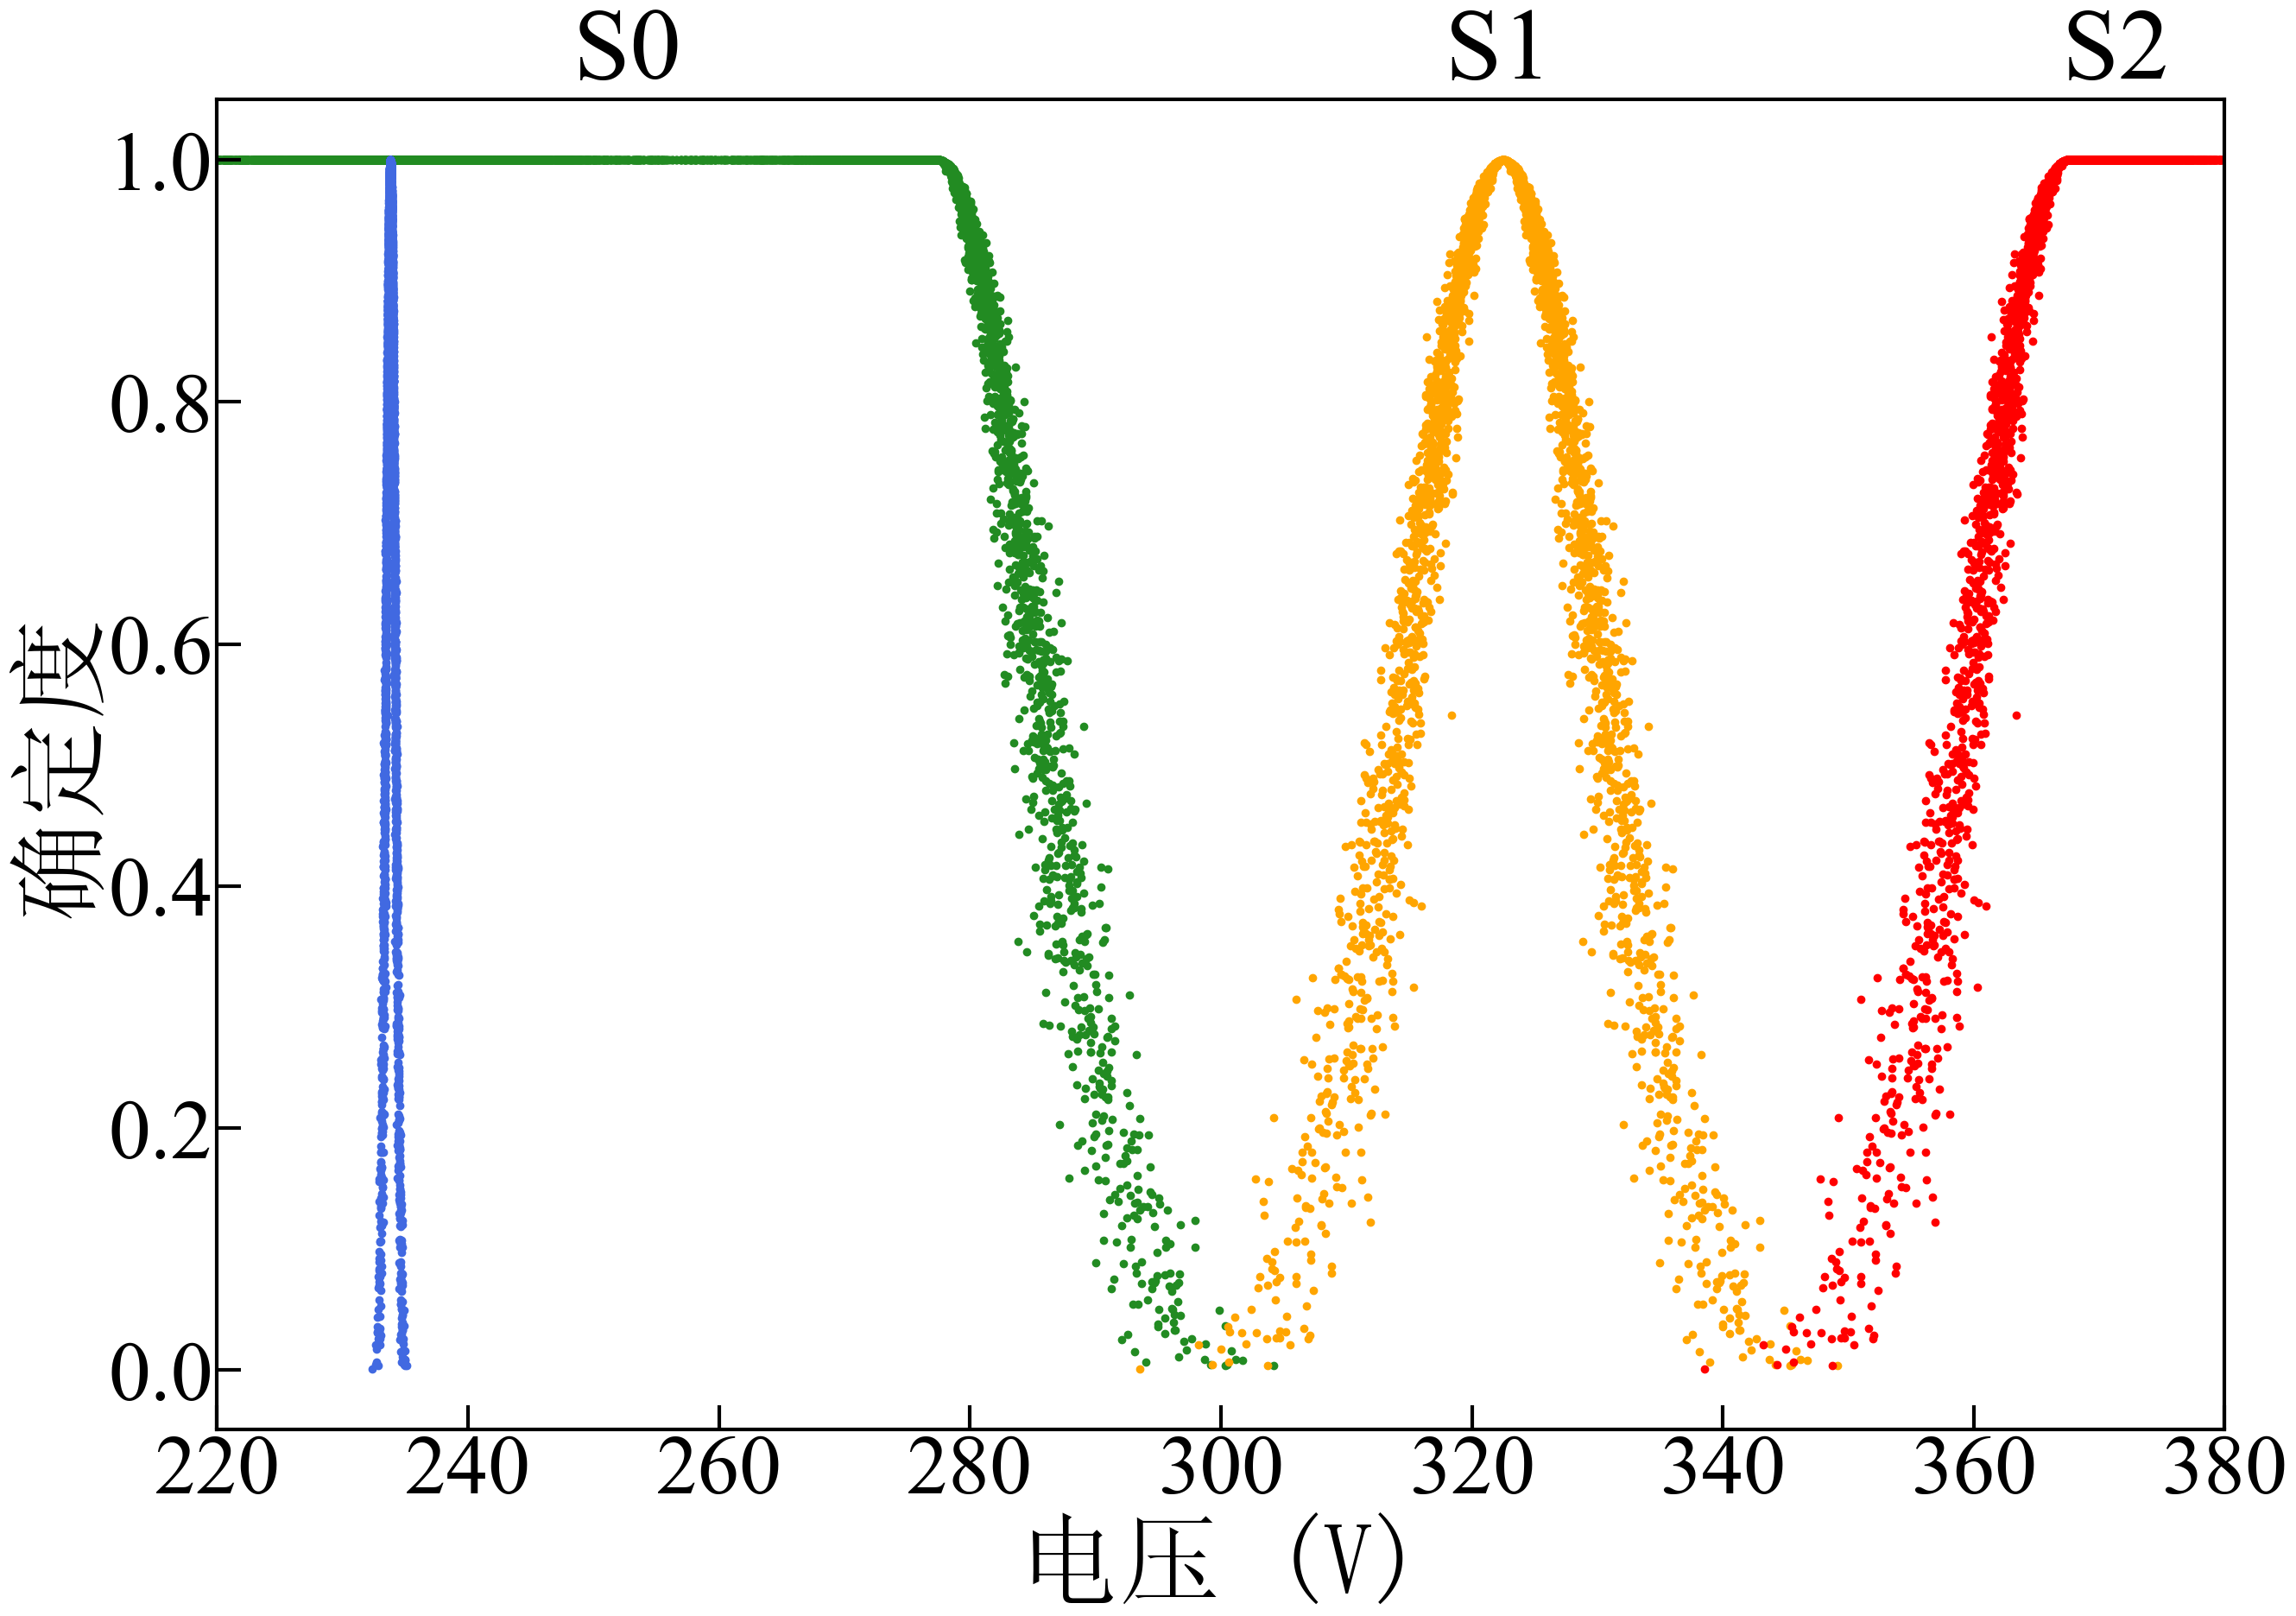

In [62]:
fig1 = plot1(param=param1)

In [70]:
X1, Y1 = cloud_model(5, 1.6667,0.2, 3000)
X2, Y2 = cloud_model(14, 1.3333, 0.2, 3000)
X3, Y3 = R_cloud_model(22, 1.3333, 0.2, 3000)
X4, Y4 = cloud_model(5.255, 0.293, 0.018, 3000)
# param2 = [[X1, Y1],[X2, Y2],[X3, Y3]]
param2 = [[X1, Y1],[X2, Y2],[X3, Y3],[X4, Y4]]

23.143865044523473 1.0
23.03579137782615 1.0
23.275415069800033 1.0
22.041405931027235 1.0
26.012625858872752 1.0
23.114627638002613 1.0
22.098971320290524 1.0
22.83353265869602 1.0
23.546516123695557 1.0
22.32250993482201 1.0
25.37258475309675 1.0
22.213368650967062 1.0
22.393875432617694 1.0
22.986389859851037 1.0
22.955970601099235 1.0
23.670346579296822 1.0
22.33629367457439 1.0
22.050597266988454 1.0
22.46046071522017 1.0
22.904867127830567 1.0
23.68021587949021 1.0
23.266016480079916 1.0
22.559950673713146 1.0
22.600826733839995 1.0
22.21330761484637 1.0
22.054250545251257 1.0
23.182203192020022 1.0
24.240142142896033 1.0
23.250468035171643 1.0
22.321910555783116 1.0
22.154507158370553 1.0
22.785839292852913 1.0
23.24591032162497 1.0
22.548021673384444 1.0
22.518331530349982 1.0
22.201900972583193 1.0
22.76425443252302 1.0
22.77340059193157 1.0
22.675113789329057 1.0
23.816163979101226 1.0
23.155867749119075 1.0
23.85980259851177 1.0
22.23360226050358 1.0
24.43421419277559 1.0
23

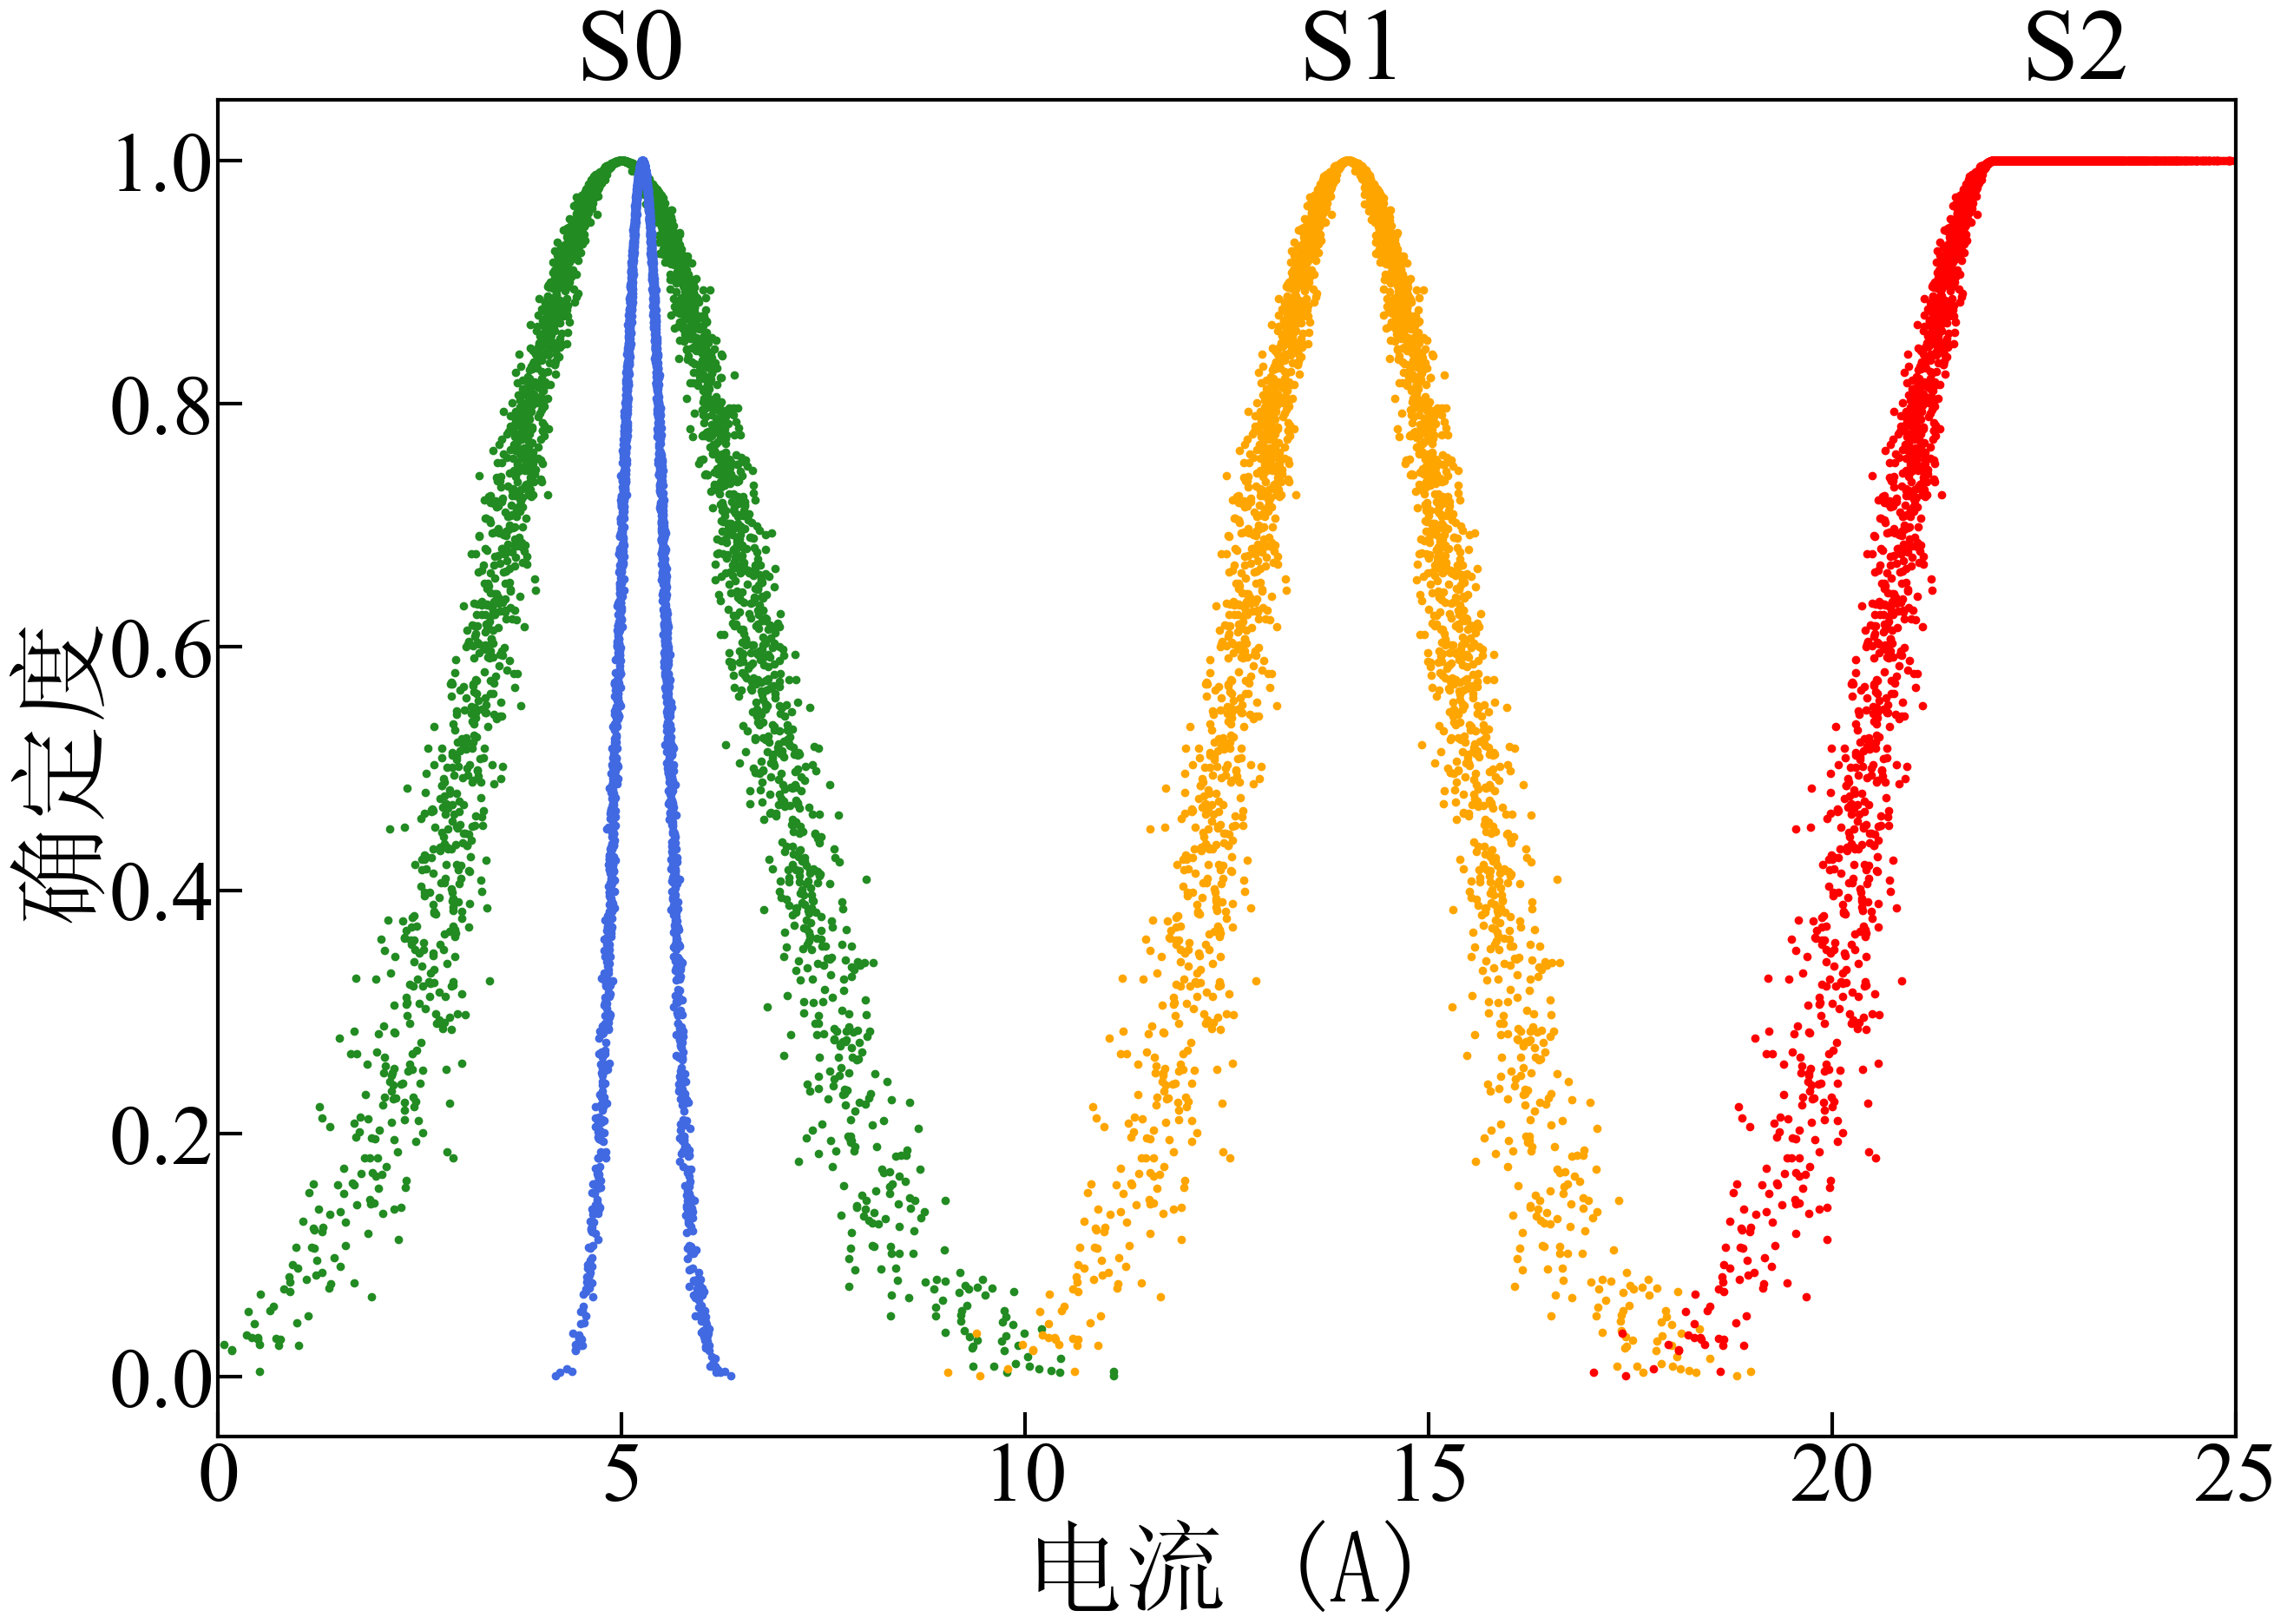

In [71]:
fig2 = plot2(param=param2)

In [63]:
X1, Y1 = cloud_model(20, 6.667, 0.5, 3000)
X2, Y2 = cloud_model(55, 5, 0.5, 3000)
X3, Y3 = R_cloud_model(85, 5,0.5, 3000)
X4, Y4 = cloud_model(21.092, 0.15, 0.05, 3000)
# param3 = [[X1, Y1],[X2, Y2],[X3, Y3]]
param3 = [[X1, Y1],[X2, Y2],[X3, Y3],[X4, Y4]]

93.0286463543681 1.0
92.41283710778428 1.0
87.8357555774544 1.0
85.16412171646778 1.0
88.65656361011298 1.0
85.15908236237652 1.0
87.51850070766397 1.0
94.32338186847139 1.0
90.0250776277403 1.0
86.86607397941282 1.0
91.53024838067867 1.0
94.49758324841721 1.0
85.32897675462428 1.0
90.8343473379341 1.0
87.72249787380586 1.0
91.53849317202965 1.0
87.39177922388421 1.0
89.14149170134223 1.0
85.50775729517528 1.0
89.37060123732014 1.0
89.637269963599 1.0
86.94168188239054 1.0
88.19260961043874 1.0
88.42313487486247 1.0
91.15748368993083 1.0
85.97853992277086 1.0
92.77949206717906 1.0
88.46736405741589 1.0
88.59358036042295 1.0
90.64143066010809 1.0
90.68882507101785 1.0
90.16298149544882 1.0
85.14828938494745 1.0
98.97861593169202 1.0
89.27632537934176 1.0
85.40689152453069 1.0
88.86362073985761 1.0
91.9902575253303 1.0
86.59959412883379 1.0
99.10221412360877 1.0
85.63092804197005 1.0
86.36469832617948 1.0
89.63299854304108 1.0
87.58201666459617 1.0
91.22036709091238 1.0
86.13095013653566

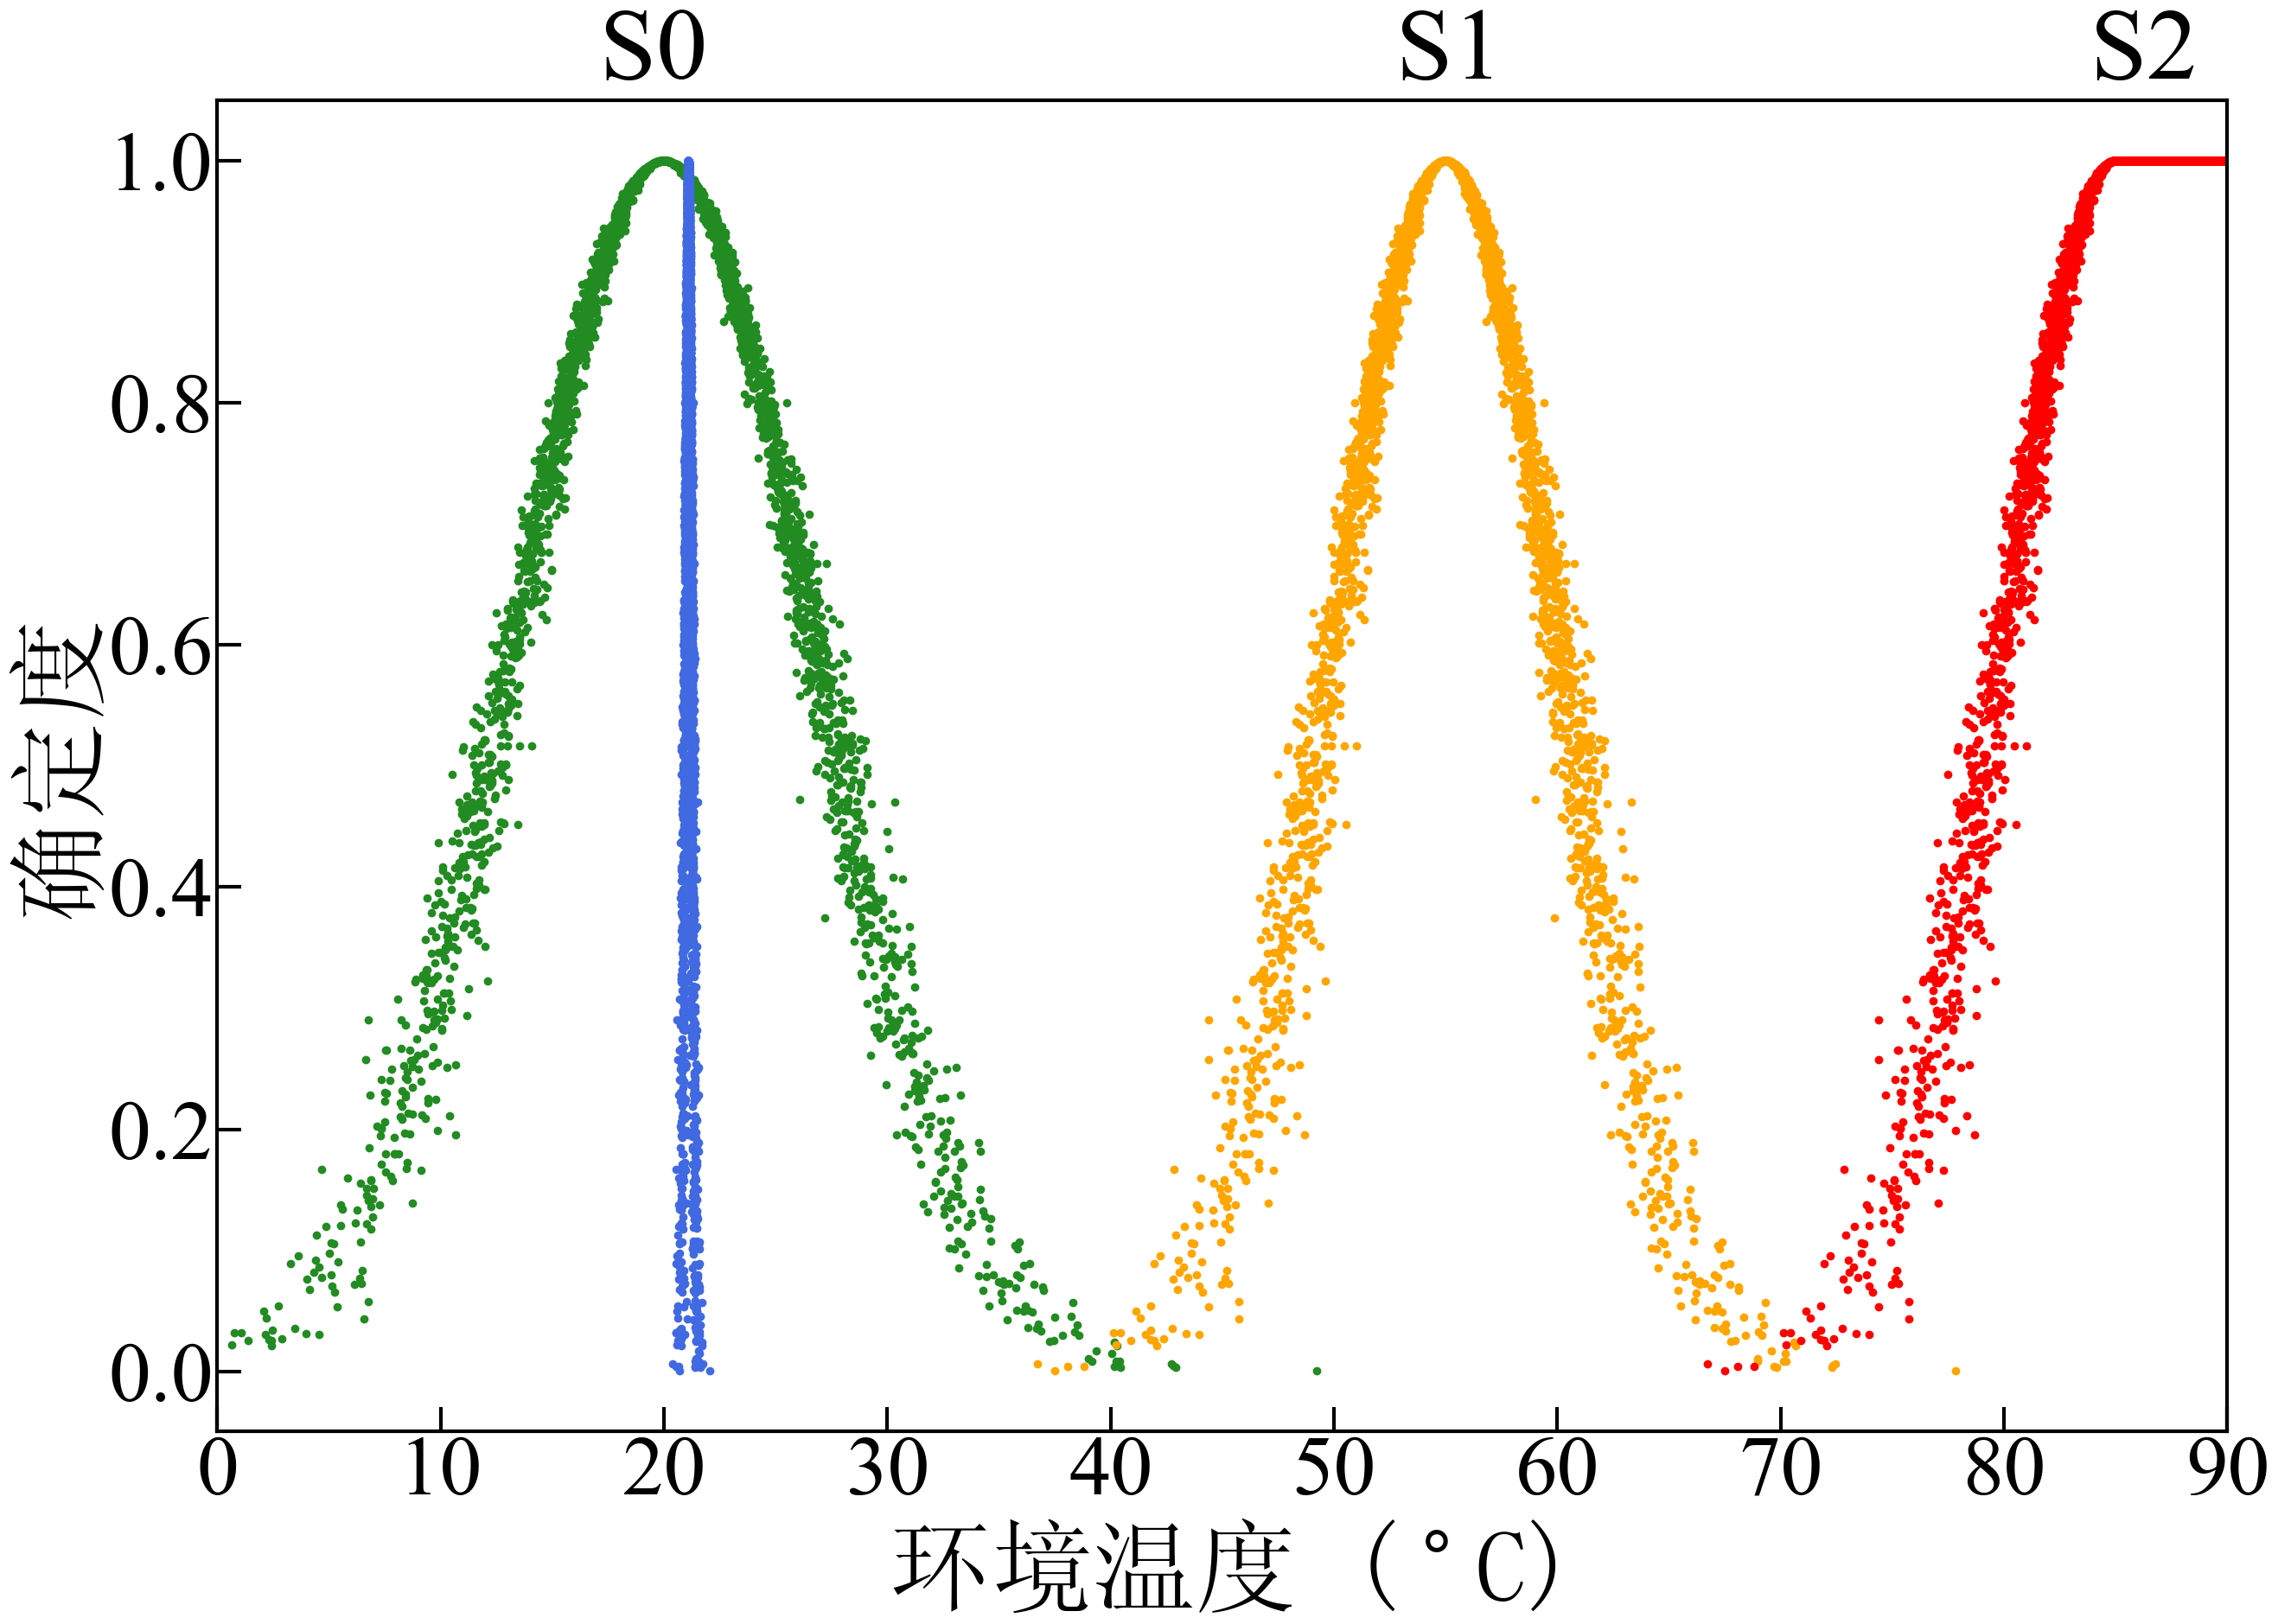

In [64]:
fig3 = plot3(param=param3)

In [68]:
X1, Y1 = cloud_model(47.5, 5.8333, 0.5, 3000)
X2, Y2 = cloud_model(75, 3.333,0.5, 3000)
X3, Y3 = cloud_model(92.5, 2.5,0.5, 3000)
X4, Y4 = cloud_model(62.616, 0.059,0.018, 3000)

# param4 = [[X1, Y1],[X2, Y2],[X3, Y3]]
param4 = [[X1, Y1],[X2, Y2],[X3, Y3],[X4, Y4]]

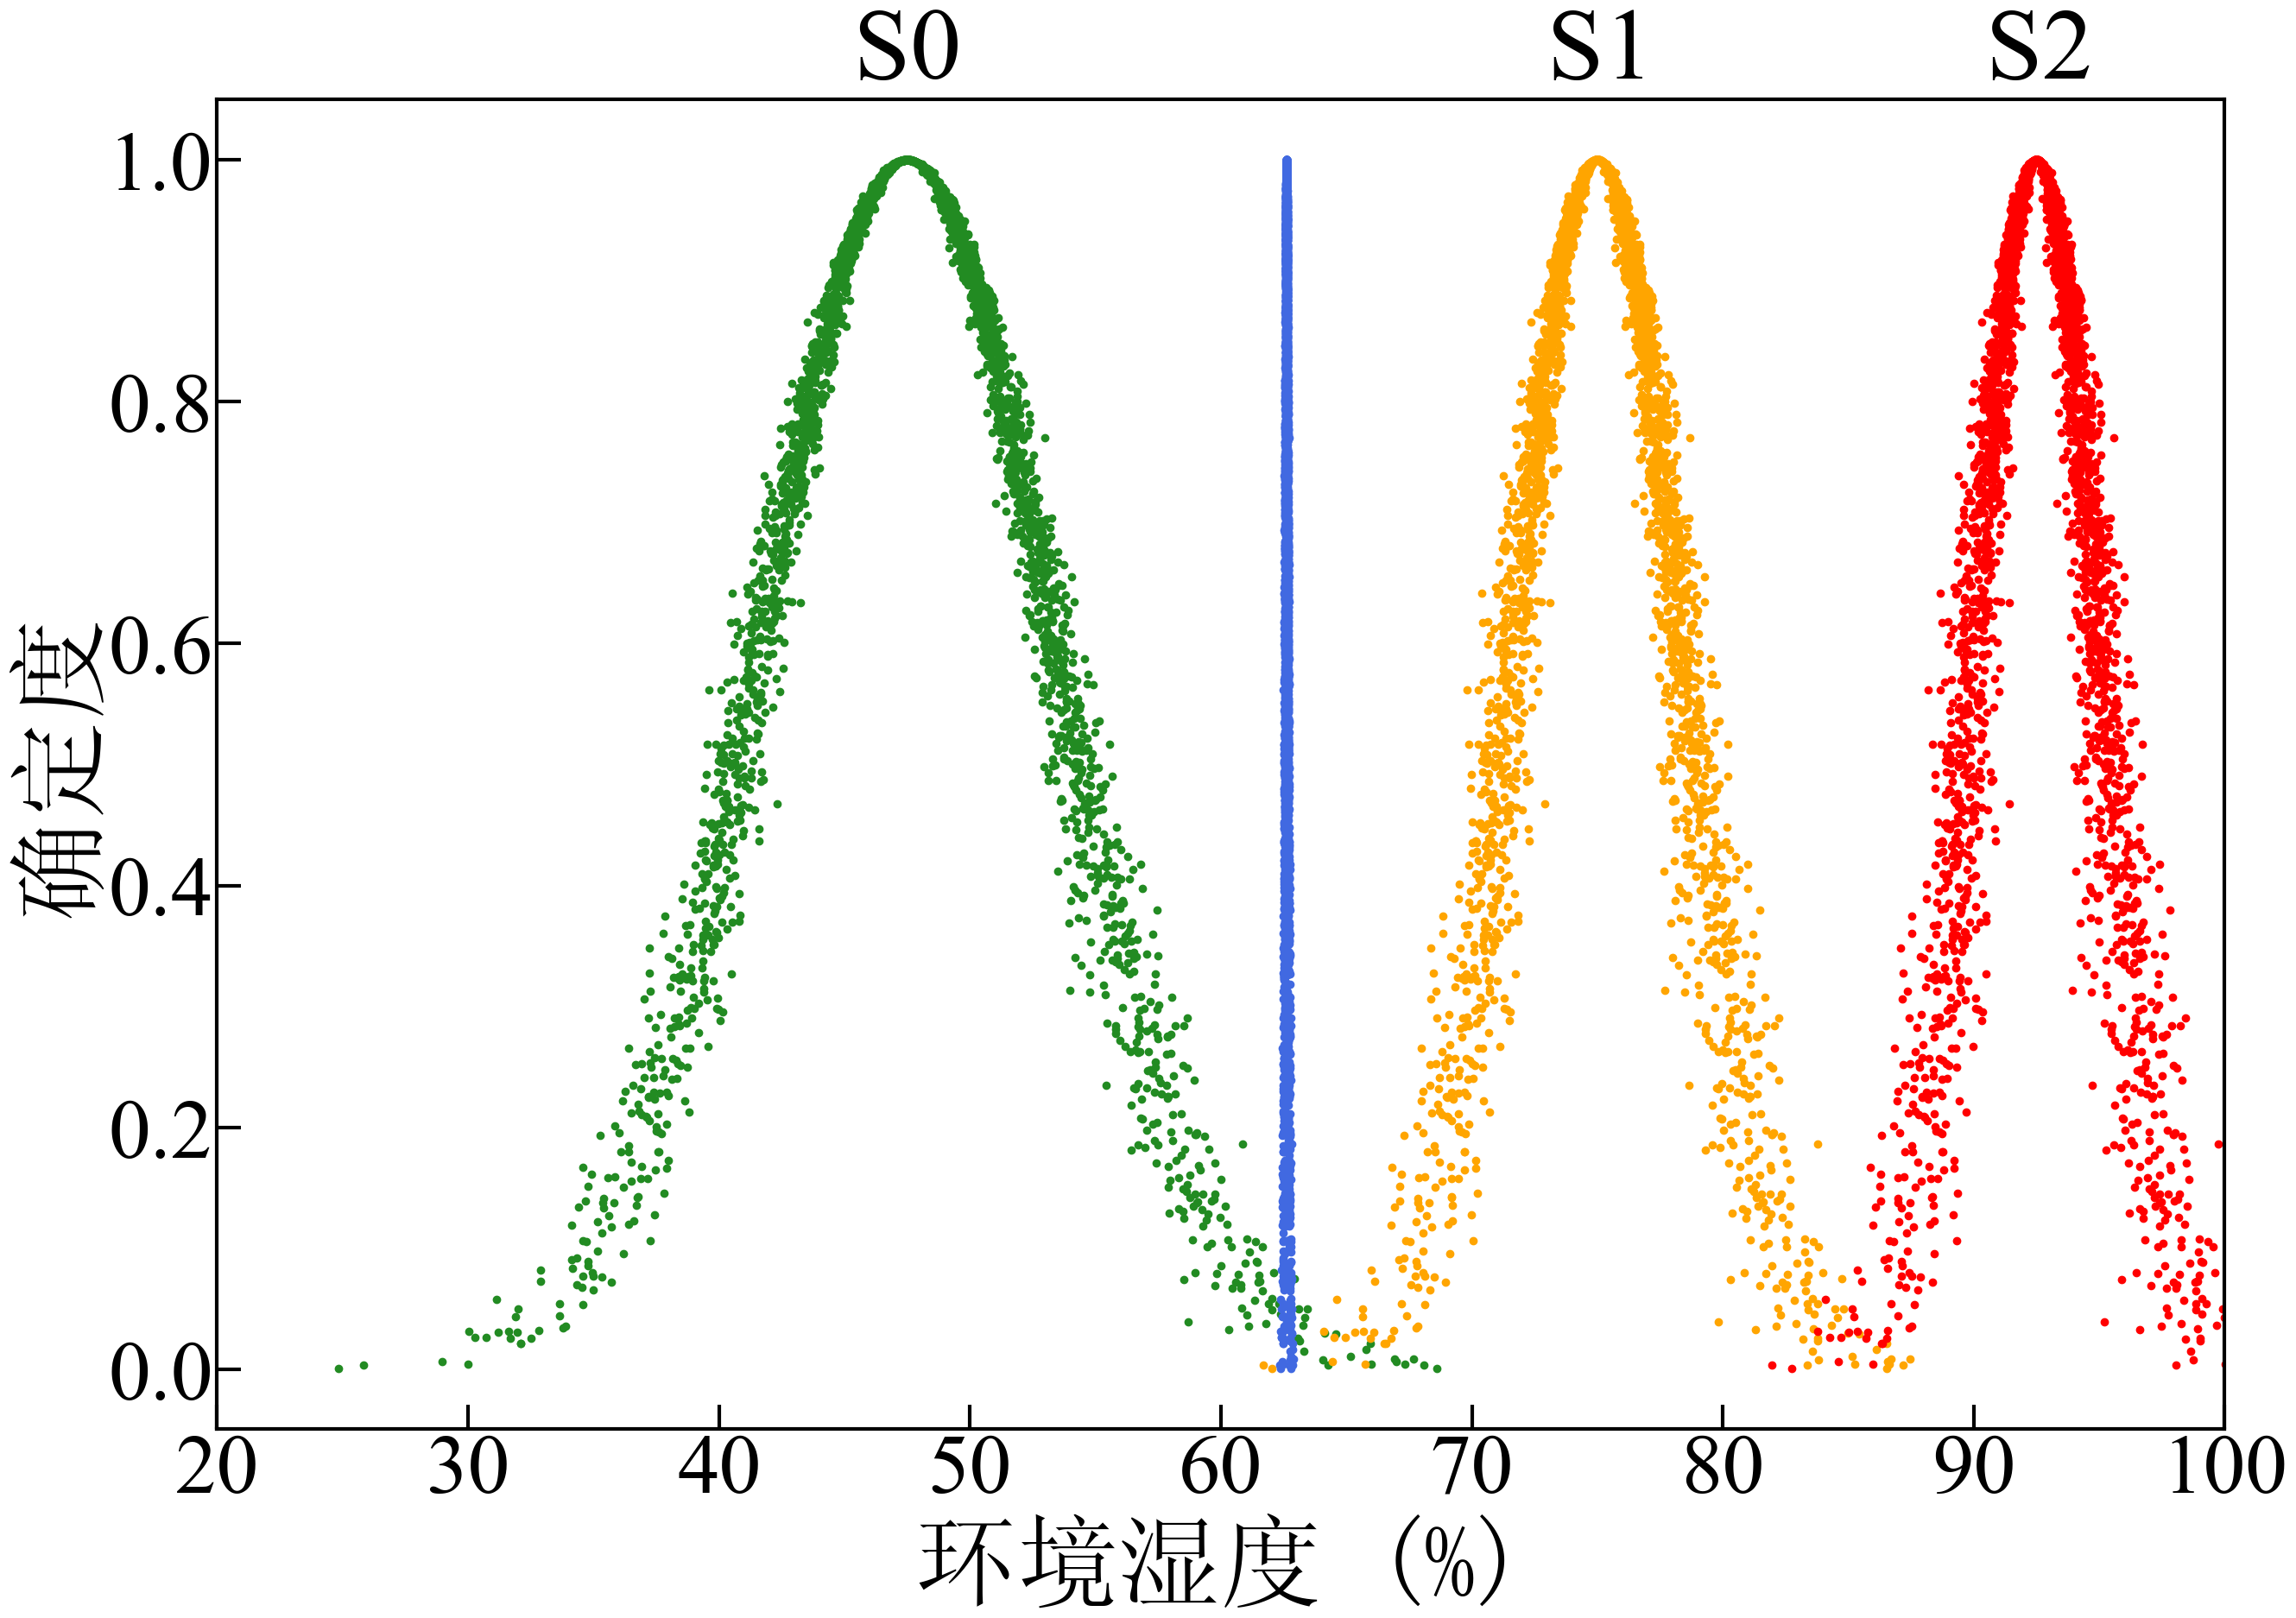

In [69]:
fig4 = plot4(param=param4)